In [217]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score, precision_recall_curve, precision_score, roc_auc_score, roc_curve, accuracy_score

In [218]:
import seaborn as sns

In [219]:
#read csv file from online github 
df2 = 'https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/conversion_data.csv'
df = pd.read_csv(df2)
df

,Unnamed: 0,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
0,0,1,North America,youtube,M,4,5,2,1,2,...,33,23,46,57,4,5,5,4,6,1
1,1,2,South America,organic,F,2,5,0,1,5,...,28,39,24,51,5,6,7,6,2,0
2,2,3,Australia,instagram,M,3,4,0,-3,5,...,34,22,34,31,1,3,3,2,3,1
3,3,4,North America,facebook,M,1,0,0,5,0,...,26,43,22,39,3,4,7,7,1,0
4,4,5,Asia,instagram,F,1,5,2,2,3,...,54,30,47,57,6,6,5,2,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,1996,Europe,organic,F,3,0,0,4,2,...,22,51,44,29,5,1,5,7,7,0
1996,1996,1997,South America,google,M,1,2,0,4,1,...,54,33,59,38,1,6,6,7,6,0
1997,1997,1998,Asia,facebook,M,2,3,0,0,8,...,32,30,48,38,2,1,7,6,4,0
1998,1998,1999,South America,youtube,F,2,2,2,5,5,...,21,51,41,56,6,4,2,2,3,1


In [220]:
df.head()

,Unnamed: 0,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
0,0,1,North America,youtube,M,4,5,2,1,2,...,33,23,46,57,4,5,5,4,6,1
1,1,2,South America,organic,F,2,5,0,1,5,...,28,39,24,51,5,6,7,6,2,0
2,2,3,Australia,instagram,M,3,4,0,-3,5,...,34,22,34,31,1,3,3,2,3,1
3,3,4,North America,facebook,M,1,0,0,5,0,...,26,43,22,39,3,4,7,7,1,0
4,4,5,Asia,instagram,F,1,5,2,2,3,...,54,30,47,57,6,6,5,2,4,1


In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2000 non-null   int64  
 1   visitor_id         2000 non-null   int64  
 2   visitor_location   2000 non-null   object 
 3   marketing_channel  2000 non-null   object 
 4   gender             2000 non-null   object 
 5   product_views_Mon  2000 non-null   int64  
 6   product_views_Tue  2000 non-null   int64  
 7   product_views_Wed  2000 non-null   int64  
 8   product_views_Thu  2000 non-null   int64  
 9   product_views_Fri  2000 non-null   int64  
 10  avg_rating_Mon     2000 non-null   float64
 11  avg_rating_Tue     2000 non-null   float64
 12  avg_rating_Wed     2000 non-null   float64
 13  avg_rating_Thu     2000 non-null   float64
 14  avg_rating_Fri     2000 non-null   float64
 15  avg_price_Mon      2000 non-null   float64
 16  avg_price_Tue      2000 

We can find that there is no missing value

In [222]:
df.drop('Unnamed: 0', axis=1, inplace = True) #drop the Unnamed: 0 Column

In [223]:
df.info() # understanding our DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   visitor_id         2000 non-null   int64  
 1   visitor_location   2000 non-null   object 
 2   marketing_channel  2000 non-null   object 
 3   gender             2000 non-null   object 
 4   product_views_Mon  2000 non-null   int64  
 5   product_views_Tue  2000 non-null   int64  
 6   product_views_Wed  2000 non-null   int64  
 7   product_views_Thu  2000 non-null   int64  
 8   product_views_Fri  2000 non-null   int64  
 9   avg_rating_Mon     2000 non-null   float64
 10  avg_rating_Tue     2000 non-null   float64
 11  avg_rating_Wed     2000 non-null   float64
 12  avg_rating_Thu     2000 non-null   float64
 13  avg_rating_Fri     2000 non-null   float64
 14  avg_price_Mon      2000 non-null   float64
 15  avg_price_Tue      2000 non-null   float64
 16  avg_price_Wed      2000 

In [224]:
distinct_values_Location = df['visitor_location'].unique()
distinct_values_Variant = df['marketing_channel'].unique()
distinct_values_gender = df['gender'].unique()
print(distinct_values_Location)
print(distinct_values_Variant)
print(distinct_values_gender)

['North America' 'South America' 'Australia' 'Asia' 'Europe']
['youtube' 'organic' 'instagram' 'facebook' 'google']
['M' 'F']


In [225]:
df.set_index('visitor_id', inplace=True)

In [226]:
df.describe(include = 'all')

,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,avg_rating_Mon,avg_rating_Tue,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
count,2000,2000,2000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
unique,5,5,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,South America,instagram,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,433,431,1093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2.541500,2.440500,2.441000,2.256500,2.354000,3.023990,3.042760,...,39.776500,40.155500,40.417000,40.028500,3.946000,4.071000,4.092500,3.921000,4.089500,0.372000
std,NaN,NaN,NaN,1.704914,1.715206,2.343345,2.370974,2.335682,1.151037,1.154019,...,11.855624,11.757399,11.892638,11.664207,2.010001,2.012209,2.002985,2.023316,2.026954,0.483459
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,-4.000000,-3.000000,1.000000,1.000000,...,20.000000,20.000000,20.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,2.017500,2.057500,...,29.000000,30.000000,30.000000,30.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,NaN,NaN,NaN,3.000000,2.000000,2.000000,2.000000,2.000000,3.055000,3.080000,...,40.000000,40.000000,40.500000,40.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000
75%,NaN,NaN,NaN,4.000000,4.000000,4.000000,5.000000,5.000000,4.022500,4.030000,...,50.000000,50.000000,51.000000,50.000000,6.000000,6.000000,6.000000,6.000000,6.000000,1.000000


In [227]:
df.groupby('converted_Fri').count()

,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,avg_rating_Mon,avg_rating_Tue,...,time_on_site_Mon,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri
converted_Fri,,,,,,,,,,,,,,,,,,,,,
0,1256,1256,1256,1256,1256,1256,1256,1256,1256,1256,...,1256,1256,1256,1256,1256,1256,1256,1256,1256,1256
1,744,744,744,744,744,744,744,744,744,744,...,744,744,744,744,744,744,744,744,744,744


In [228]:
df.columns

Index(['visitor_location', 'marketing_channel', 'gender', 'product_views_Mon',
       'product_views_Tue', 'product_views_Wed', 'product_views_Thu',
       'product_views_Fri', 'avg_rating_Mon', 'avg_rating_Tue',
       'avg_rating_Wed', 'avg_rating_Thu', 'avg_rating_Fri', 'avg_price_Mon',
       'avg_price_Tue', 'avg_price_Wed', 'avg_price_Thu', 'avg_price_Fri',
       'time_on_site_Mon', 'time_on_site_Tue', 'time_on_site_Wed',
       'time_on_site_Thu', 'time_on_site_Fri', 'pages_visited_Mon',
       'pages_visited_Tue', 'pages_visited_Wed', 'pages_visited_Thu',
       'pages_visited_Fri', 'converted_Fri'],
      dtype='object')

In [229]:
df.drop_duplicates(inplace=True) #We need to drop rows with all values are the same
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 1 to 2000
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   visitor_location   2000 non-null   object 
 1   marketing_channel  2000 non-null   object 
 2   gender             2000 non-null   object 
 3   product_views_Mon  2000 non-null   int64  
 4   product_views_Tue  2000 non-null   int64  
 5   product_views_Wed  2000 non-null   int64  
 6   product_views_Thu  2000 non-null   int64  
 7   product_views_Fri  2000 non-null   int64  
 8   avg_rating_Mon     2000 non-null   float64
 9   avg_rating_Tue     2000 non-null   float64
 10  avg_rating_Wed     2000 non-null   float64
 11  avg_rating_Thu     2000 non-null   float64
 12  avg_rating_Fri     2000 non-null   float64
 13  avg_price_Mon      2000 non-null   float64
 14  avg_price_Tue      2000 non-null   float64
 15  avg_price_Wed      2000 non-null   float64
 16  avg_price_Thu      2000 

Because there are too many columns, we now group the data into fewer columns: We calculate the average of product view, avg rating, avg,

In [230]:
df['product_views_total'] = (df['product_views_Mon'] + df['product_views_Tue'] + df['product_views_Wed'] + df['product_views_Thu'] + df['product_views_Fri'])/5
df['avg_rating_total'] = (df['avg_rating_Mon'] + df['avg_rating_Tue'] + df['avg_rating_Wed'] + df['avg_rating_Thu'] + df['avg_rating_Fri'])/5
df['avg_price_total'] = (df['avg_price_Mon'] + df['avg_price_Tue'] + df['avg_price_Wed'] + df['avg_price_Thu'] + df['avg_price_Fri'])/5
df['time_on_site_total'] = (df['time_on_site_Mon'] + df['time_on_site_Tue'] + df['time_on_site_Wed'] + df['time_on_site_Thu'] + df['time_on_site_Fri'])/5
df['pages_visited_total'] = (df['pages_visited_Mon'] + df['pages_visited_Tue'] + df['pages_visited_Wed'] + df['pages_visited_Thu'] + df['pages_visited_Fri'])/5


In [231]:
dummies_gender = pd.get_dummies(df.gender, dtype=int)

In [232]:
df = pd.concat([df,dummies_gender.iloc[:, 1]], axis=1)

In [233]:
df.head()

,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,avg_rating_Mon,avg_rating_Tue,...,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri,product_views_total,avg_rating_total,avg_price_total,time_on_site_total,pages_visited_total,M
visitor_id,,,,,,,,,,,,,,,,,,,,,
1,North America,youtube,M,4,5,2,1,2,3.90,2.19,...,5,4,6,1,2.8,3.134,54.738,43.2,4.8,1
2,South America,organic,F,2,5,0,1,5,1.31,2.16,...,7,6,2,0,2.6,2.068,71.432,33.2,5.2,0
3,Australia,instagram,M,3,4,0,-3,5,3.26,4.79,...,3,2,3,1,1.8,3.666,64.358,28.8,2.4,1
4,North America,facebook,M,1,0,0,5,0,2.66,4.79,...,7,7,1,0,1.2,3.300,56.048,37.2,4.4,1
5,Asia,instagram,F,1,5,2,2,3,2.76,2.38,...,5,2,4,1,2.6,2.364,46.442,44.6,4.6,0


Column M represents gender: male or not 

<AxesSubplot:xlabel='converted_Fri', ylabel='time_on_site_total'>

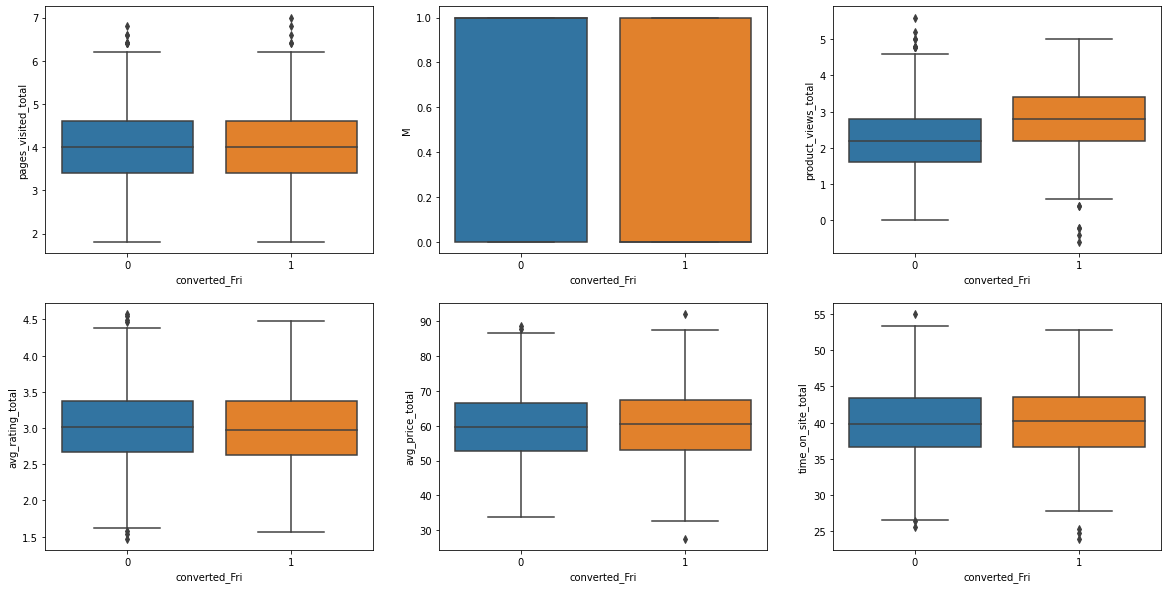

In [234]:
import matplotlib.pyplot as plt

fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, figsize=(20,10))
sns.boxplot(x='converted_Fri', y='pages_visited_total', ax=ax1, data=df)
sns.boxplot(x='converted_Fri', y='M', ax=ax2, data=df)
sns.boxplot(x='converted_Fri', y='product_views_total', ax=ax3, data=df)
sns.boxplot(x='converted_Fri', y='avg_rating_total', ax=ax4, data=df)
sns.boxplot(x='converted_Fri', y='avg_price_total', ax=ax5, data=df)
sns.boxplot(x='converted_Fri', y='time_on_site_total', ax=ax6, data=df)

In [235]:
df.drop(df[(df['pages_visited_total']>=6.5)].index,axis =0,
        inplace=True)
df.drop(df[(df['product_views_total']>=5)].index,axis =0,
        inplace=True)
df.drop(df[(df['avg_price_total']>=90)].index,axis =0,
        inplace=True)
df.drop(df[(df['time_on_site_total']<25)].index,axis =0,
        inplace=True)

<AxesSubplot:xlabel='converted_Fri', ylabel='time_on_site_total'>

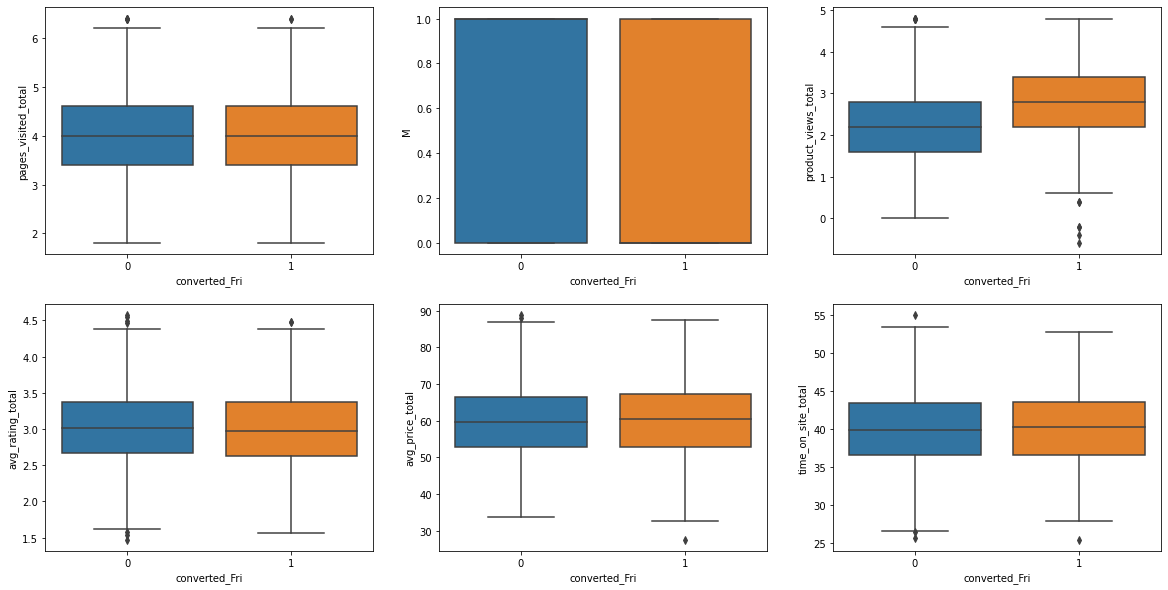

In [236]:

fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, figsize=(20,10))
sns.boxplot(x='converted_Fri', y='pages_visited_total', ax=ax1, data=df)
sns.boxplot(x='converted_Fri', y='M', ax=ax2, data=df)
sns.boxplot(x='converted_Fri', y='product_views_total', ax=ax3, data=df)
sns.boxplot(x='converted_Fri', y='avg_rating_total', ax=ax4, data=df)
sns.boxplot(x='converted_Fri', y='avg_price_total', ax=ax5, data=df)
sns.boxplot(x='converted_Fri', y='time_on_site_total', ax=ax6, data=df)

Now we removed the outliers

In [237]:
df.groupby('converted_Fri').describe()

product_views_Mon                                               \
                          count      mean       std  min  25%  50%  75%  max   
converted_Fri                                                                  
0                        1249.0  2.551641  1.713193  0.0  1.0  3.0  4.0  5.0   
1                         735.0  2.506122  1.684891  0.0  1.0  2.0  4.0  5.0   

              product_views_Tue            ... pages_visited_total       \
                          count      mean  ...                 75%  max   
converted_Fri                              ...                            
0                        1249.0  2.405925  ...                 4.6  6.4   
1                         735.0  2.480272  ...                 4.6  6.4   

                    M                                               
                count      mean       std  min  25%  50%  75%  max  
converted_Fri                                                       
0              1249.0  0.521217  0.499750  0.0  0.0  1.0  1.0  1.0  
1               735.0  0.341497  0.474535  0.0  0.0  0.0  1.0  1.0  

[2 rows x 248 columns]

Now, we do hypothesis testing first to see if there are significant data.

In [238]:
from scipy import stats

In [239]:
var1 = df[df['converted_Fri']== 0]['pages_visited_total']
control = df[df['converted_Fri']== 1]['pages_visited_total']

p_val = stats.ttest_ind(var1, control)
print(p_val)

Ttest_indResult(statistic=0.7158392935819694, pvalue=0.47417491069893547)


In [240]:
var1 = df[df['converted_Fri']== 0]['product_views_total']
control = df[df['converted_Fri']== 1]['product_views_total']

p_val = stats.ttest_ind(var1, control)
print(p_val)

Ttest_indResult(statistic=-15.59362479491596, pvalue=8.449005105576238e-52)


In [241]:
var1 = df[df['converted_Fri']== 0]['M']
control = df[df['converted_Fri']== 1]['M']

p_val = stats.ttest_ind(var1, control)
print(p_val)

Ttest_indResult(statistic=7.880553213887422, pvalue=5.33020994355421e-15)


In [242]:
var1 = df[df['converted_Fri']== 0]['avg_rating_total']
control = df[df['converted_Fri']== 1]['avg_rating_total']

p_val = stats.ttest_ind(var1, control)
print(p_val)

Ttest_indResult(statistic=0.46369653327631166, pvalue=0.642916099028326)


In [243]:

var1 = df[df['converted_Fri']== 0]['avg_price_total']
control = df[df['converted_Fri']== 1]['avg_price_total']

p_val = stats.ttest_ind(var1, control)
print(p_val)

Ttest_indResult(statistic=-0.9556485774285239, pvalue=0.33936635270321724)


In [244]:
var1 = df[df['converted_Fri']== 0]['time_on_site_total']
control = df[df['converted_Fri']== 1]['time_on_site_total']

p_val = stats.ttest_ind(var1, control)
print(p_val)

Ttest_indResult(statistic=-0.42619598879199316, pvalue=0.6700113204907692)


In [245]:
# checking location
loc_1 = df[df['visitor_location'] == 'North America']['converted_Fri']
loc_2 = df[df['visitor_location'] == 'South America']['converted_Fri']
loc_3 = df[df['visitor_location'] == 'Australia']['converted_Fri']
loc_4 = df[df['visitor_location'] == 'Asia']['converted_Fri']
loc_5 = df[df['visitor_location'] == 'Europe']['converted_Fri']
p_val = stats.f_oneway(loc_1, loc_2, loc_3,loc_4,loc_5)
print(p_val)

F_onewayResult(statistic=1.7783445018790391, pvalue=0.1304826055410326)


In [246]:
# checking marketing_channel
loc_1 = df[df['marketing_channel'] == 'youtube']['converted_Fri']
loc_2 = df[df['marketing_channel'] == 'organic']['converted_Fri']
loc_3 = df[df['marketing_channel'] == 'instagram']['converted_Fri']
loc_4 = df[df['marketing_channel'] == 'facebook']['converted_Fri']
loc_5 = df[df['marketing_channel'] == 'google']['converted_Fri']
p_val = stats.f_oneway(loc_1, loc_2, loc_3,loc_4,loc_5)
print(p_val)

F_onewayResult(statistic=10.607938689269881, pvalue=1.6646353103218468e-08)


We can find that column M, product_views_total and marketing channel are the significant one. 
When comparing , we see there are significant differences between variant and the control. Now we check which data works better:

In [247]:
df.groupby('converted_Fri')[['product_views_total']].mean()

,product_views_total
converted_Fri,
0,2.154524
1,2.809796


We can observe that people who converted has a higher mean for the total product views

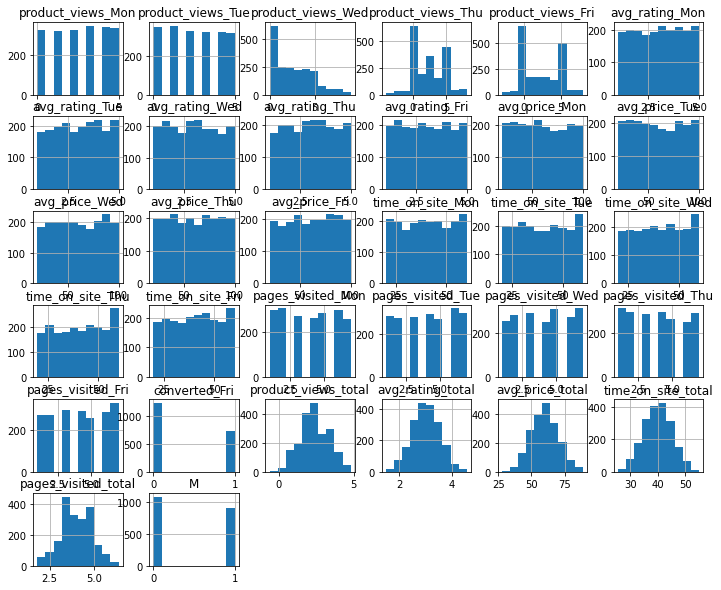

In [248]:
# Histograms
df.hist(figsize=(12, 10)) # we can quickly create all histograms at once 
plt.show()

In [249]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso

In [250]:
results = ols("converted_Fri ~ M + marketing_channel + product_views_total ", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          converted_Fri   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     58.42
Date:                Wed, 09 Aug 2023   Prob (F-statistic):           9.52e-67
Time:                        20:19:58   Log-Likelihood:                -1209.1
No. Observations:                1984   AIC:                             2432.
Df Residuals:                    1977   BIC:                             2471.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

We can find that these three variables only have R-squared = 0.151, thus we need to find other models to do the prediction.

In [251]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso

In [252]:
dummies_marketing_channel= pd.get_dummies(df.marketing_channel, dtype=int)

In [253]:
df = pd.concat([df,dummies_marketing_channel],axis=1)

In [254]:
df.head()

,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,avg_rating_Mon,avg_rating_Tue,...,avg_rating_total,avg_price_total,time_on_site_total,pages_visited_total,M,facebook,google,instagram,organic,youtube
visitor_id,,,,,,,,,,,,,,,,,,,,,
1,North America,youtube,M,4,5,2,1,2,3.90,2.19,...,3.134,54.738,43.2,4.8,1,0,0,0,0,1
2,South America,organic,F,2,5,0,1,5,1.31,2.16,...,2.068,71.432,33.2,5.2,0,0,0,0,1,0
3,Australia,instagram,M,3,4,0,-3,5,3.26,4.79,...,3.666,64.358,28.8,2.4,1,0,0,1,0,0
4,North America,facebook,M,1,0,0,5,0,2.66,4.79,...,3.300,56.048,37.2,4.4,1,1,0,0,0,0
5,Asia,instagram,F,1,5,2,2,3,2.76,2.38,...,2.364,46.442,44.6,4.6,0,0,0,1,0,0


In [263]:
# separate features and target
categorical_features = ['M','google','facebook','instagram','organic','youtube']
numerical_features = ['product_views_total']
target = 'converted_Fri'

In [264]:
# split data in train / test
X_train, X_test, y_train, y_test = train_test_split(df[categorical_features + numerical_features]
                                                    ,df[target],
                                                    test_size = 0.3, random_state=1234)

In [265]:
# define transformers
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])

In [266]:
# building processor
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, categorical_features),
                                                 ('num', num_transformer, numerical_features)])

In [267]:
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [268]:
linear_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['M', 'google', 'facebook',
                                                   'instagram', 'organic',
                                                   'youtube']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['product_views_total'])])),
                ('regressor', LinearRegression())])

In [269]:
pred = linear_regression.predict(X_test)

In [270]:
pred

array([ 0.421875 ,  0.328125 ,  0.671875 ,  0.3828125,  0.03125  ,
        0.25     ,  0.859375 ,  0.296875 ,  0.1171875,  0.640625 ,
        0.734375 ,  0.296875 ,  0.1171875,  0.359375 ,  0.359375 ,
        0.15625  ,  0.453125 ,  0.453125 ,  0.296875 ,  0.453125 ,
        0.59375  ,  0.53125  ,  0.3984375,  0.6328125,  0.015625 ,
        0.       ,  0.421875 ,  0.1484375,  0.21875  ,  0.625    ,
        0.234375 ,  0.40625  ,  0.1875   ,  0.3125   ,  0.140625 ,
        0.28125  ,  0.484375 ,  0.21875  ,  0.515625 ,  0.3515625,
        0.109375 ,  0.59375  ,  0.015625 , -0.03125  ,  0.546875 ,
        0.65625  ,  0.3515625,  0.5625   ,  0.34375  ,  0.359375 ,
        0.0625   , -0.0234375,  0.53125  ,  0.3828125,  0.65625  ,
        0.234375 ,  0.1875   ,  0.25     ,  0.359375 ,  0.390625 ,
        0.3671875,  0.6796875,  0.09375  ,  0.3125   ,  0.234375 ,
        0.5      ,  0.1796875,  0.390625 ,  0.421875 ,  0.25     ,
        0.5625   ,  0.2109375,  0.71875  ,  0.3515625,  0.7968

In [271]:
from sklearn.metrics import mean_squared_error

In [272]:
np.sqrt(mean_squared_error(pred,y_test))

0.46752189862867105

In [273]:
ridge_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=3.0))
])

In [274]:
ridge_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['M', 'google', 'facebook',
                                                   'instagram', 'organic',
                                                   'youtube']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['product_views_total'])])),
                ('regressor', Ridge(alpha=3.0))])

In [275]:
pred_ridge = ridge_regression.predict(X_test)

In [276]:
np.sqrt(mean_squared_error(pred_ridge,y_test))

0.4668979095957034

In [277]:
lasso_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1.0))
])

In [278]:
lasso_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['M', 'google', 'facebook',
                                                   'instagram', 'organic',
                                                   'youtube']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['product_views_total'])])),
                ('regressor', Lasso())])

In [279]:
lasso_pred = lasso_regression.predict(X_test)

In [280]:
np.sqrt(mean_squared_error(lasso_pred, y_test))

0.49204303724109943

In [281]:
elasticnet_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=1.0, l1_ratio=0.8))
])

In [282]:
elasticnet_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['M', 'google', 'facebook',
                                                   'instagram', 'organic',
                                                   'youtube']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['product_views_total'])])),
                ('regressor', ElasticNet(l1_ratio=0.8))])

In [283]:
elasticnet_pred = elasticnet_regression.predict(X_test)

In [284]:
np.sqrt(mean_squared_error(elasticnet_pred, y_test))

0.49204303724109943

From the MSE calculated above, we can find that based on the MSE values and the R-squared value, it seems that the Ridge, lasso, elasticnet, and Linear regression models perform similarly in terms of predictive accuracy, while the OLS regression model provides less explanatory power in capturing the relationship between the selected features and the target variable. 

This suggests that the these model have a moderate level of explanatory power, capturing a substantial portion of the variability in the target variable using the selected predictor variables.

Since the linear models did not performing well, we now look at the logistic regression

In [285]:
df.columns

Index(['visitor_location', 'marketing_channel', 'gender', 'product_views_Mon',
       'product_views_Tue', 'product_views_Wed', 'product_views_Thu',
       'product_views_Fri', 'avg_rating_Mon', 'avg_rating_Tue',
       'avg_rating_Wed', 'avg_rating_Thu', 'avg_rating_Fri', 'avg_price_Mon',
       'avg_price_Tue', 'avg_price_Wed', 'avg_price_Thu', 'avg_price_Fri',
       'time_on_site_Mon', 'time_on_site_Tue', 'time_on_site_Wed',
       'time_on_site_Thu', 'time_on_site_Fri', 'pages_visited_Mon',
       'pages_visited_Tue', 'pages_visited_Wed', 'pages_visited_Thu',
       'pages_visited_Fri', 'converted_Fri', 'product_views_total',
       'avg_rating_total', 'avg_price_total', 'time_on_site_total',
       'pages_visited_total', 'M', 'facebook', 'google', 'instagram',
       'organic', 'youtube'],
      dtype='object')

In [287]:
dummies_marketing_channel2= pd.get_dummies(df.visitor_location, dtype=int)

In [288]:
df = pd.concat([df,dummies_marketing_channel2],axis=1)

In [289]:
df.head()

,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,avg_rating_Mon,avg_rating_Tue,...,facebook,google,instagram,organic,youtube,Asia,Australia,Europe,North America,South America
visitor_id,,,,,,,,,,,,,,,,,,,,,
1,North America,youtube,M,4,5,2,1,2,3.90,2.19,...,0,0,0,0,1,0,0,0,1,0
2,South America,organic,F,2,5,0,1,5,1.31,2.16,...,0,0,0,1,0,0,0,0,0,1
3,Australia,instagram,M,3,4,0,-3,5,3.26,4.79,...,0,0,1,0,0,0,1,0,0,0
4,North America,facebook,M,1,0,0,5,0,2.66,4.79,...,1,0,0,0,0,0,0,0,1,0
5,Asia,instagram,F,1,5,2,2,3,2.76,2.38,...,0,0,1,0,0,1,0,0,0,0


In [290]:
df.columns

Index(['visitor_location', 'marketing_channel', 'gender', 'product_views_Mon',
       'product_views_Tue', 'product_views_Wed', 'product_views_Thu',
       'product_views_Fri', 'avg_rating_Mon', 'avg_rating_Tue',
       'avg_rating_Wed', 'avg_rating_Thu', 'avg_rating_Fri', 'avg_price_Mon',
       'avg_price_Tue', 'avg_price_Wed', 'avg_price_Thu', 'avg_price_Fri',
       'time_on_site_Mon', 'time_on_site_Tue', 'time_on_site_Wed',
       'time_on_site_Thu', 'time_on_site_Fri', 'pages_visited_Mon',
       'pages_visited_Tue', 'pages_visited_Wed', 'pages_visited_Thu',
       'pages_visited_Fri', 'converted_Fri', 'product_views_total',
       'avg_rating_total', 'avg_price_total', 'time_on_site_total',
       'pages_visited_total', 'M', 'facebook', 'google', 'instagram',
       'organic', 'youtube', 'Asia', 'Australia', 'Europe', 'North America',
       'South America'],
      dtype='object')

In [291]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
columns = [ 'product_views_total',
       'avg_rating_total', 'avg_price_total', 'time_on_site_total',
       'pages_visited_total', 'M','facebook', 'google', 'instagram',
       'organic', 'youtube','Asia', 'Australia', 'Europe', 'North America',
       'South America']

log.fit(df[columns], df['converted_Fri'])


/Users/frieda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [297]:
pred = log.predict(df[['product_views_total',
       'avg_rating_total', 'avg_price_total', 'time_on_site_total',
       'pages_visited_total', 'M','facebook', 'google', 'instagram',
       'organic', 'youtube','Asia', 'Australia', 'Europe', 'North America',
       'South America']])

In [298]:
print(accuracy_score(pred,df['converted_Fri']))
print(f1_score(pred,df['converted_Fri']))
print(precision_score(pred,df['converted_Fri']))
print(recall_score(pred,df['converted_Fri']))

0.703125
0.5284227381905524
0.4489795918367347
0.642023346303502


An accuracy score of approximately 0.70 suggests that the model is making accurate predictions on the dataset. The F1 score, precision score, and recall score provide a more detailed view of the model's performance in terms of trade-offs between true positives, false positives, and false negatives. We can find the result from f1_score and precision score did not look good. 

In [302]:
pd.DataFrame([log.feature_names_in_,log.coef_.flatten()]).T

,0,1
0,product_views_total,0.810452
1,avg_rating_total,-0.133247
2,avg_price_total,0.0021
3,time_on_site_total,0.007947
4,pages_visited_total,-0.040141
5,M,-0.683675
6,facebook,-0.122307
7,google,-0.102519
8,instagram,-0.147916
9,organic,-0.99586


These coefficients represent the log-odds changes in the target variable 'converted_Fri' for a unit change in each respective predictor variable while holding other variables constant. The positive coefficients indicate a positive association with the likelihood of the target event, while the negative coefficients indicate a negative association.

These findings provide insights into how each predictor variable contributes to the prediction of the target variable in your logistic regression model. We can find that most of the variables are having negative coefficients, while  product_views_total, avg_price_total and time_on_site_total show a positive coefficient. 